In [0]:
#--Load Libraries and data
library(ggplot2)
idsDATA = read.csv("Y:/fa2018-csc300dsa/completed/Assignment9/miri-IDS01.csv",header=TRUE)

In [0]:
#--Inspect data
head(idsDATA)

InPKT.sec,portProbes.sec,NumSrcIP.sec,Logins.sec,IntrusionType
5.1,3.5,1.4,0.2,Port Scan
4.9,3.0,1.4,0.2,Port Scan
4.7,3.2,1.3,0.2,Port Scan
4.6,3.1,1.5,0.2,Port Scan
5.0,3.6,1.4,0.2,Port Scan
5.4,3.9,1.7,0.4,Port Scan


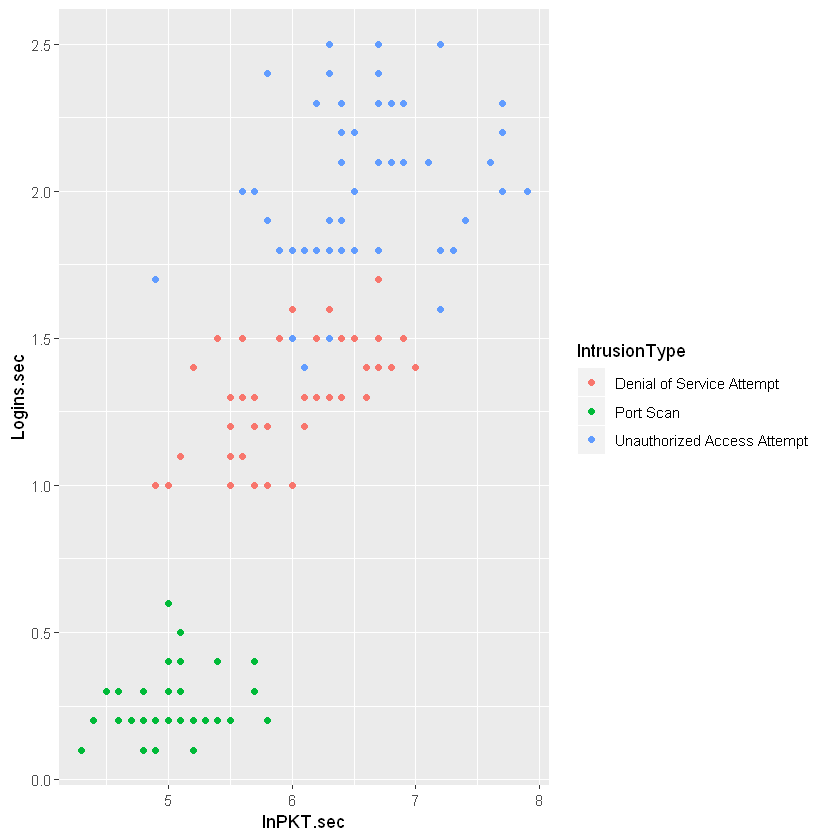

In [0]:
#--Scatter plot of number of Incoming Packets and Unauthorized Login Attemps - color by known Intrusion Type
ggplot(idsDATA, aes(InPKT.sec, Logins.sec, color = IntrusionType)) + geom_point()

In [0]:
#--Create variable for storing the Mean Square Error for each cluster solitions 1 - 10
IDSperformance=c()
#--Loop 10 times
for (i in rep(1:10))
{
 #compute Kmeans solition   
 IDSclust=kmeans(idsDATA[,1:4],i)
 #store MSE for cluster   
 IDSperformance=c(IDSperformance,1-IDSclust$tot.withinss/IDSclust$totss)
}
#--Interogate the performance variable
str(IDSperformance)
IDSperformance

 num [1:10] 9.99e-16 7.76e-01 8.84e-01 9.16e-01 9.27e-01 ...


[1] 9.992007e-16 7.764096e-01 8.842753e-01 9.159553e-01 9.268713e-01
 [6] 9.294509e-01 9.414073e-01 9.479600e-01 9.581661e-01 9.618938e-01

[1] 681.37060 152.34795  78.85144  57.22847  46.44618  39.03999  34.29823
 [8]  30.06311  27.78609  25.83405  24.44098  22.66600  21.66192  19.94470
[15]  18.80312

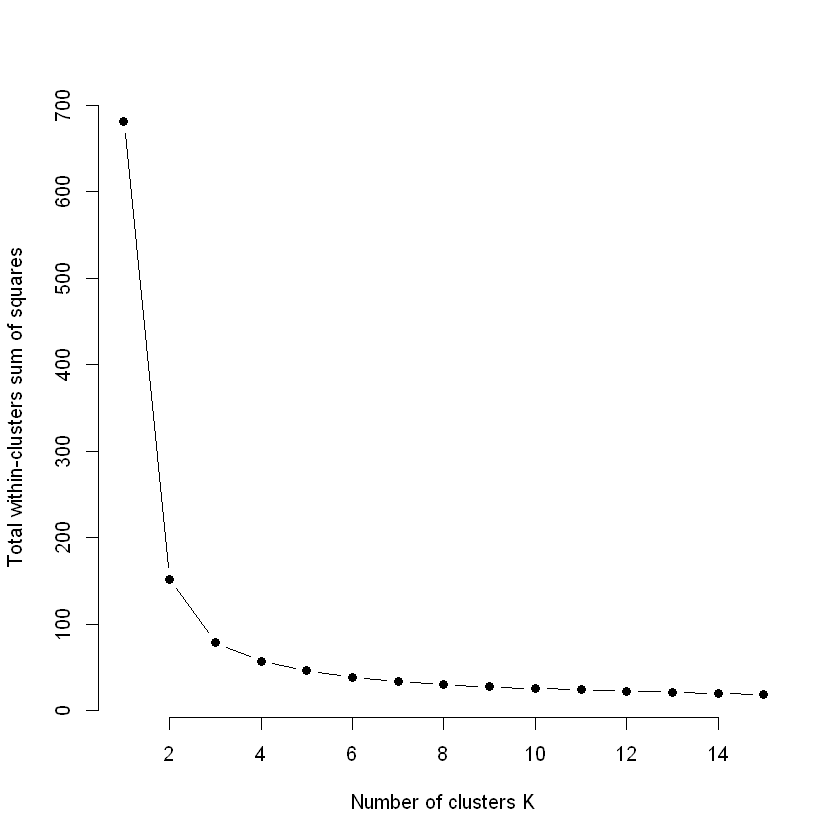

In [0]:
#--Plot Performance data using Elbow Method for finding the optimal number of clusters
set.seed(123)
#--Compute and plot wss for k = 2 to k = 15.
k.max <- 15
data <- idsDATA[,1:4]
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
#--Display MSE
wss
#--Plot MSE
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [0]:
#--Elbow curve indicates a 3 cluster solution is best
#--Aplly k-means algorithm with no. of centroids(k)=3
IDSresult<- kmeans(idsDATA[,1:4],3)
#-- Show number of records in each cluster
IDSresult$size

[1] 62 50 38

In [0]:

#-- Show value of cluster center datapoint value(3 centers for k=3)
IDSresult$centers

,InPKT.sec,portProbes.sec,NumSrcIP.sec,Logins.sec
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


In [0]:
#--List cluster vector showing the custer where each record falls
IDSresult$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

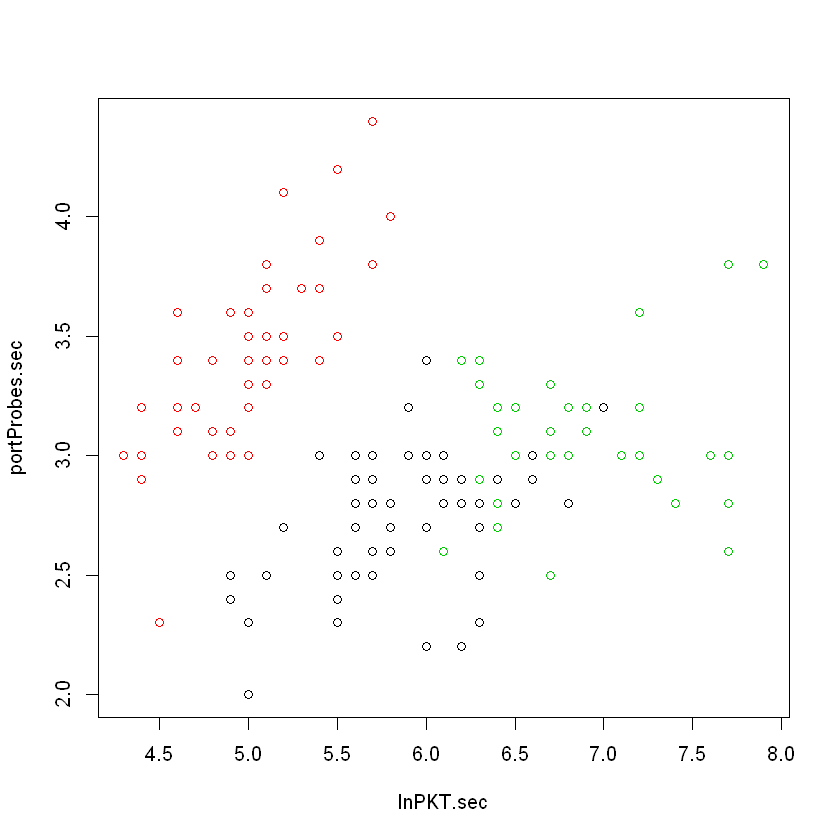

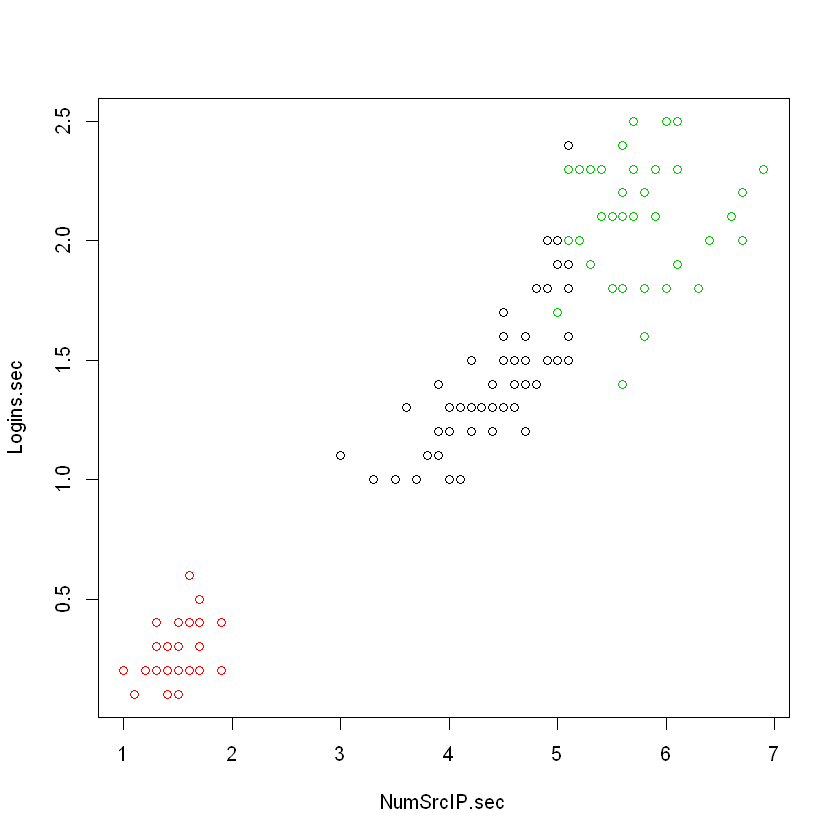

In [0]:
#--Plot to see how InPKT.sec and portProbes.sec data points have been distributed in clusters
plot(idsDATA[c(1,2)], col=IDSresult$cluster)

# Plot to see how NumSrcIP.sec Logins.sec data points have been distributed in clusters
plot(idsDATA[c(3,4)], col=IDSresult$cluster)

In [0]:
#--List results of Cluster Analysis using Confution Matrix and Classificaiton Accuracy
print('Confusion Matrix')
table(IDSresult$cluster,idsDATA[,"IntrusionType"])

#--Calculate Classification Accuracy of 3 Cluster Solution
b <- IDSresult$betweenss
t <- IDSresult$totss
ClassificationAccuracy <- b/t

print (paste('Classification Accuracy = ', ClassificationAccuracy))

[1] "Confusion Matrix"


   
    Denial of Service Attempt Port Scan Unauthorized Access Attempt
  1                        48         0                          14
  2                         0        50                           0
  3                         2         0                          36

[1] "Classification Accuracy =  0.884275251344648"


NULL

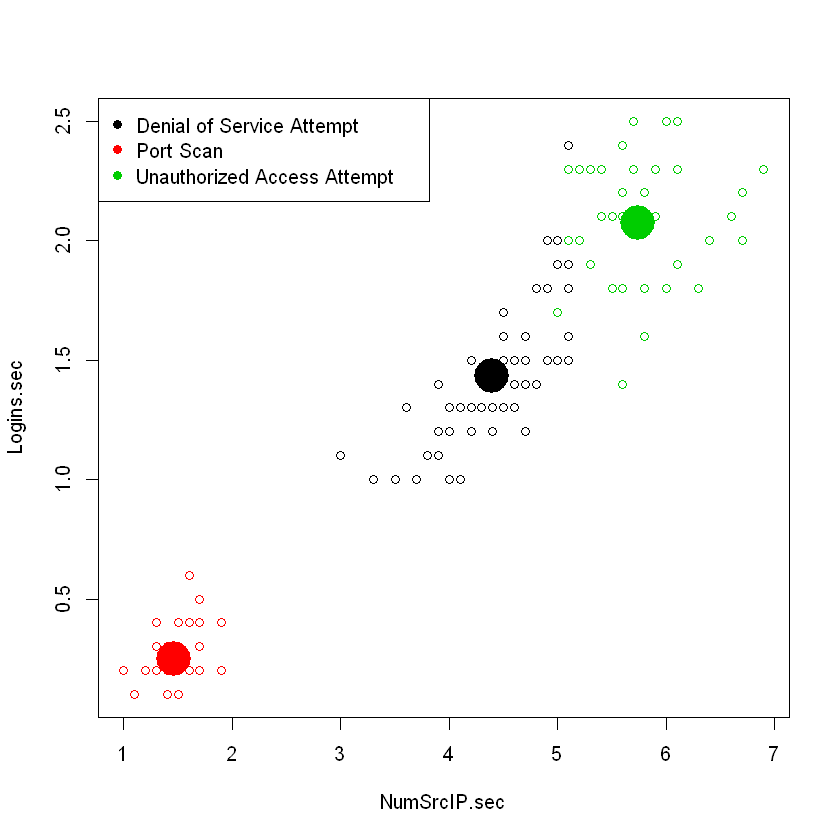

In [0]:
#--Plot to see how NumSrcIP.sec Logins.sec data points have been distributed in clusters with cluster centriod value
plot(idsDATA[c("NumSrcIP.sec", "Logins.sec")], col=IDSresult$cluster) + geom_point()

#--Plot the cluster centroids
points(IDSresult$centers[,c("NumSrcIP.sec", "Logins.sec")], col=1:3, pch=16, cex=4)
#--Add Legend
legend("topleft",legend=levels(idsDATA[,"IntrusionType"]),col=1:3, pch=16)